In [1]:
import sys
sys.path.append("/home/ubuntu/MultiModalDeepFake")
import nemo.collections.asr as nemo_asr 

/home/ubuntu/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.24.3) or chardet (5.1.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
2023-04-12 23:00:42.326020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 23:00:42.431403: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-12 23:00:42.966139: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.c

In [2]:
from packages.LJDataLoader import LJDataLoader
from packages.AudioEmbeddingsManager import AudioEmbeddingsManager

## Generate the Train/Dev/Test

In [5]:
file_path = '/home/ubuntu/data/wavefake_data/LJ_metadata_16000KHz.csv'
loader = LJDataLoader(data_path=file_path)
loader.sample(0.1)
loader.splitData()

source_architectures = ['Full_Band_MelGan', 'HifiGan', 'MelGan', 'MelGanLarge', 'Multi_Band_MelGan', 'Parallel_WaveGan', 'Waveglow']
new_col_name = 'RandWaveFake'
loader.selectRandomArchitecture(target_col=new_col_name, source_cols=source_architectures)

data_df = loader.generateFinalDataFrame(real_col='Real', fake_cols=['RandWaveFake', 'ElevenLabs', 'MelGanLarge'], balanced=True)
#data_df = loader.generateFinalDataFrame(real_col='Real', fake_cols = ['Full_Band_MelGan', 'HifiGan', 'MelGan', 'MelGanLarge', 'Multi_Band_MelGan', 'Parallel_WaveGan', 'Waveglow'])

In [6]:
print(data_df['label'].value_counts())
print(data_df['multiclass_label'].value_counts())

0    1306
1    1306
Name: label, dtype: int64
0    1306
1     448
3     433
2     425
Name: multiclass_label, dtype: int64


# Testing Additive Noise Feature

In [20]:
import numpy as np
import soundfile as sf
import librosa
import math

Refs:
* https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
* chatgpt!

In [ ]:
from packages.AudioManager

Original:


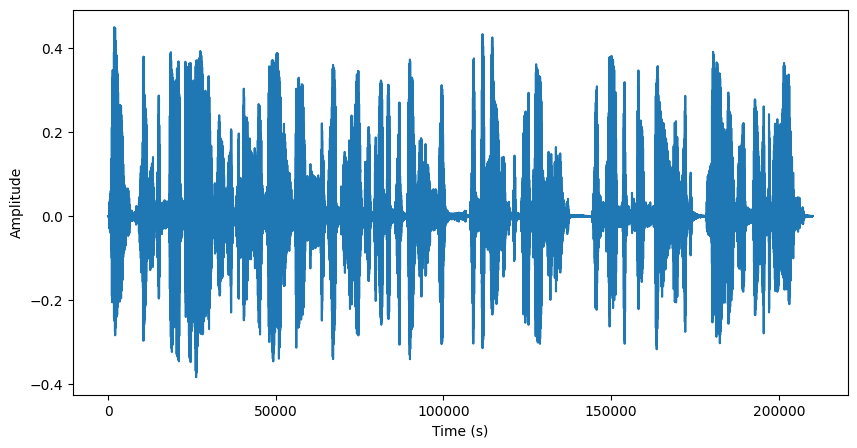

Noisy:
len audio: 210078, len noise: 210078


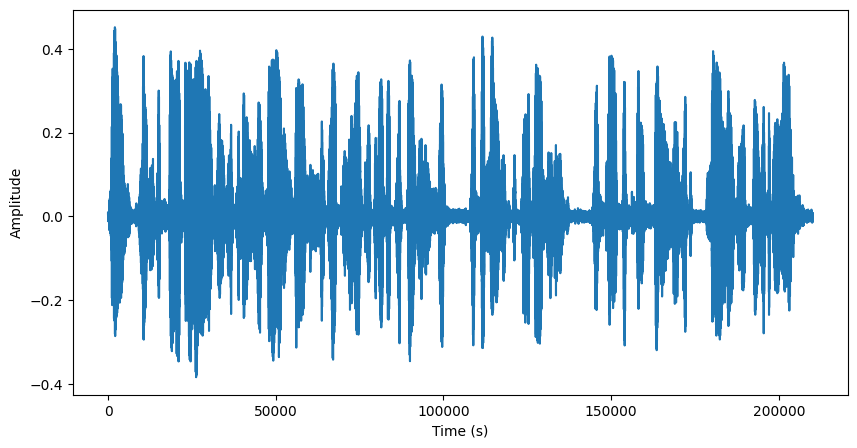

In [39]:
import matplotlib.pyplot as plt 
from random import randint

output_file = '../../data/test_noise_file.wav'
test_file = data_df['path'][0]

def add_noise_with_snr(audio_path: str, snr_range: list = [10, 80]):
    # Load audio file
    audio, sr = librosa.load(audio_path)

    # Calculate audio power
    audio_power = np.mean(audio ** 2)

    # Select random SNR between 10 and 80dB
    noise_snr = randint(snr_range[0], snr_range[1])
    
    # Calculate noise power from SNR
    noise_power = audio_power / (10 ** (noise_snr / 10))

    # Generate noise with same length as audio
    noise = np.random.normal(scale=np.sqrt(noise_power), size=len(audio))

    # Add noise to audio
    noisy_audio = audio + noise

    # Write noisy audio to file
    sf.write('noisy_audio.wav', noisy_audio, sr)
    
    print(f'len audio: {len(audio)}, len noise: {len(noisy_audio)}')

    return noisy_audio

print('Original:')
# Load audio file
audio, sr = librosa.load(test_file)

# Calculate time array
time = range(len(audio))

# Plot audio waveform
plt.figure(figsize=(10, 5))
plt.plot(time, audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

print('Noisy:')

noisy_audio = add_noise_with_snr(test_file)

# Calculate time array
time = range(len(noisy_audio))

# Plot audio waveform
plt.figure(figsize=(10, 5))
plt.plot(time, noisy_audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

(array([1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 7.000e+00, 1.100e+01, 9.000e+00, 2.100e+01,
        3.200e+01, 4.600e+01, 5.400e+01, 7.100e+01, 9.000e+01, 1.050e+02,
        1.520e+02, 2.120e+02, 2.740e+02, 3.250e+02, 3.980e+02, 4.690e+02,
        6.170e+02, 7.270e+02, 8.750e+02, 1.120e+03, 1.256e+03, 1.494e+03,
        1.794e+03, 2.027e+03, 2.413e+03, 2.744e+03, 3.045e+03, 3.514e+03,
        3.857e+03, 4.328e+03, 4.780e+03, 5.016e+03, 5.340e+03, 5.804e+03,
        6.066e+03, 6.554e+03, 6.759e+03, 7.110e+03, 7.349e+03, 7.608e+03,
        7.537e+03, 7.400e+03, 7.416e+03, 7.362e+03, 7.272e+03, 6.892e+03,
        6.691e+03, 6.591e+03, 6.130e+03, 5.866e+03, 5.476e+03, 4.940e+03,
        4.623e+03, 4.183e+03, 3.704e+03, 3.401e+03, 3.092e+03, 2.626e+03,
        2.366e+03, 2.080e+03, 1.799e+03, 1.510e+03, 1.206e+03, 1.060e+03,
        8.640e+02, 7.240e+02, 5.970e+02, 4.600e+02, 3.690e+02, 3.220e+02,
        2.570e+02, 1.770e+02, 1.510e+0

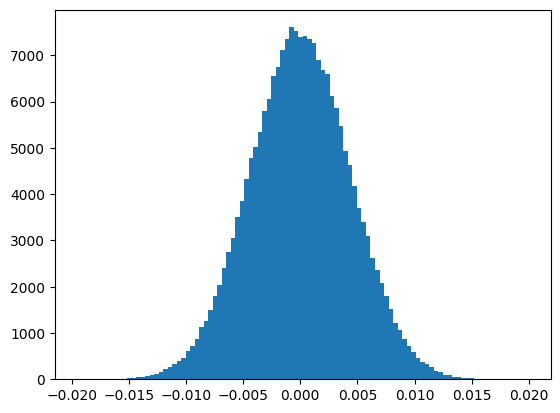

In [47]:
# check noise
plt.hist(noisy_audio - audio, bins=100)

In [35]:
from scipy.io import wavfile
import IPython.display as ipd

fs, audio = wavfile.read(test_file)
ipd.Audio(audio, rate=fs)

## Generate the Features

In [ ]:
speaker_model = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained(model_name='titanet_large')

In [ ]:
embedding_manager = AudioEmbeddingsManager(model=speaker_model, data=df)

In [ ]:
embeddings = embedding_manager.generateEmbeddings()

In [ ]:
emeddings_df = pd.DataFrame(embeddings)


## Predict and Evaluate

In [ ]:
import numpy as np
test1 = np.array([[1,2,3], [4,5,6]])
test2 = np.array([[7,8,9], [1,2,3]])

np.concatenate((test1, test2), axis=0)

In [ ]:
print('test')